In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
tbl = pd.read_excel('Reynolds.xlsx')
tbl

,ScalesSold,MonthsEmployed
0,275,41
1,296,106
2,317,76
3,376,104
4,162,22
5,150,12
6,367,85
7,308,111
8,189,40
9,235,51


Text(0.5, 0, 'Months Employed')

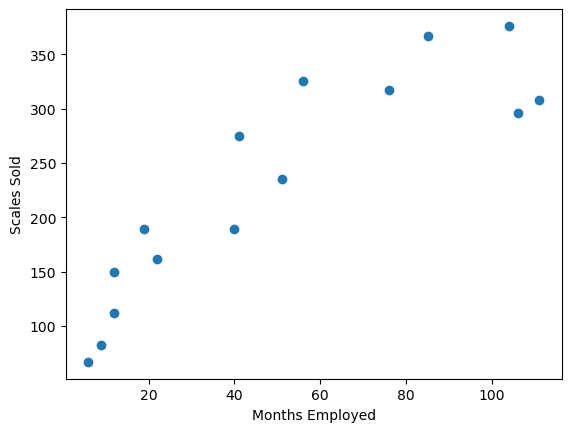

In [3]:
# scatter plot before going for regression analysis
plt.scatter(tbl['MonthsEmployed'], tbl['ScalesSold'])
plt.ylabel('Scales Sold')
plt.xlabel('Months Employed')
# show +ve trend

In [4]:
x = tbl['MonthsEmployed']
y = tbl['ScalesSold']
x2 = sm.add_constant(x)
model = sm.OLS(y,x2) # y is dependent variable and x2 is indepndent variable bcoz in x2 we are having x variable also 
Model = model.fit()
print(Model.summary())

# Interpreting OLS Regression Result:
# p-value = 1.24*10^-5 as a whole the model is significant
# then look at the signicant of individual variable. The monthEmployed is independent variable 
# and it's p-value (P>|t|) <0.05 So monthsEmployed is a significant variable 

                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.24e-05
Time:                        11:16:40   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.2279     21.628      5.

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
# residual plot. It is not only the R- square,fp-value, individaual significance value is important
# the same time you have to check the residual of that regression model
E = Model.resid_pearson
E

array([ 1.33945744, -1.35645713,  0.50765989,  0.35518943, -0.03063607,
        0.20702037,  1.08543558, -1.35411191, -0.34936157,  0.05163116,
       -1.00208207, -0.56041143, -1.18121025,  1.62923113,  0.65864542])

In [6]:
# yhat value is predict  value of x2 and x2 is independent variable
# yhat is our predicted y-value
yhat = Model.predict(x2)
yhat

0     208.675693
1     363.166061
2     291.862814
3     358.412511
4     163.516970
5     139.749221
6     313.253788
7     375.049935
8     206.298918
9     232.443442
10    132.618896
11    139.749221
12    125.488571
13    244.327316
14    156.386645
dtype: float64

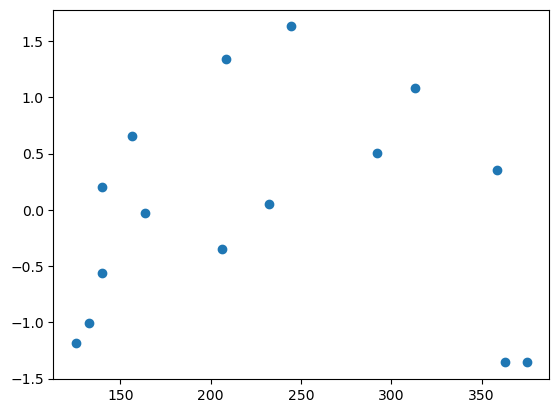

In [7]:
plt.scatter(yhat,E) # yhat is x-axis and E(error) is y-axis
# It shows there may be curvilinear relationship between x and y
# NOt only R^2 and Significant value. Apart from that we have to draw the 
# different residual plot to verify whether the model is correct or not.
# When we are plotting the standardized residual model. It is suggesting for a 
# nonlinear relationship.

In [8]:
X_sq = (x**2)
X_sq
# For a second ordered equation x^2 is to be created as a new independent var

0      1681
1     11236
2      5776
3     10816
4       484
5       144
6      7225
7     12321
8      1600
9      2601
10       81
11      144
12       36
13     3136
14      361
Name: MonthsEmployed, dtype: int64

In [9]:
# check whether model is significant or not using OLS Regression Result
x_new = np.column_stack((x,X_sq))
x_new2 = sm.add_constant(x_new)
model2 = sm.OLS(y,x_new2)
Model2 = model2.fit()
print(Model2.summary())
# R-squared=0.9 good
# x1 and x2 p-values <0.05

                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           8.75e-07
Time:                        11:16:40   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3476     22.775      1.991      0.0

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
# Standardized Residual Plot of New Variable
E2 = Model2.resid_pearson
E2

array([ 0.797777  , -0.99895952, -0.32984543,  1.27097898, -0.18118441,
        0.97178443,  0.91436152, -0.48542046, -1.59531168, -1.28395183,
       -0.48348828, -0.13117488, -0.44045635,  0.94303218,  1.03185873])

In [11]:
yhat2 = Model2.predict(x_new2)
yhat2

array([247.5143749 , 330.41691942, 328.36408757, 332.21125762,
       168.24230429, 116.51933758, 335.49771571, 324.72407789,
       243.96290147, 279.23569304,  99.65750913, 116.51933758,
        82.17493987, 292.50993204, 153.44961189])

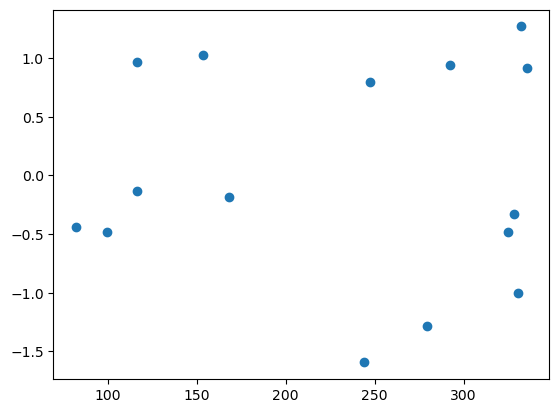

In [12]:
plt.scatter(yhat2,E2)